<a href="https://colab.research.google.com/github/cesar1109/Fundamentos-de-Ciencia-de-Dados---2024/blob/main/Exercise_2_Dados_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB
None

Estatísticas Descritivas:
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min    

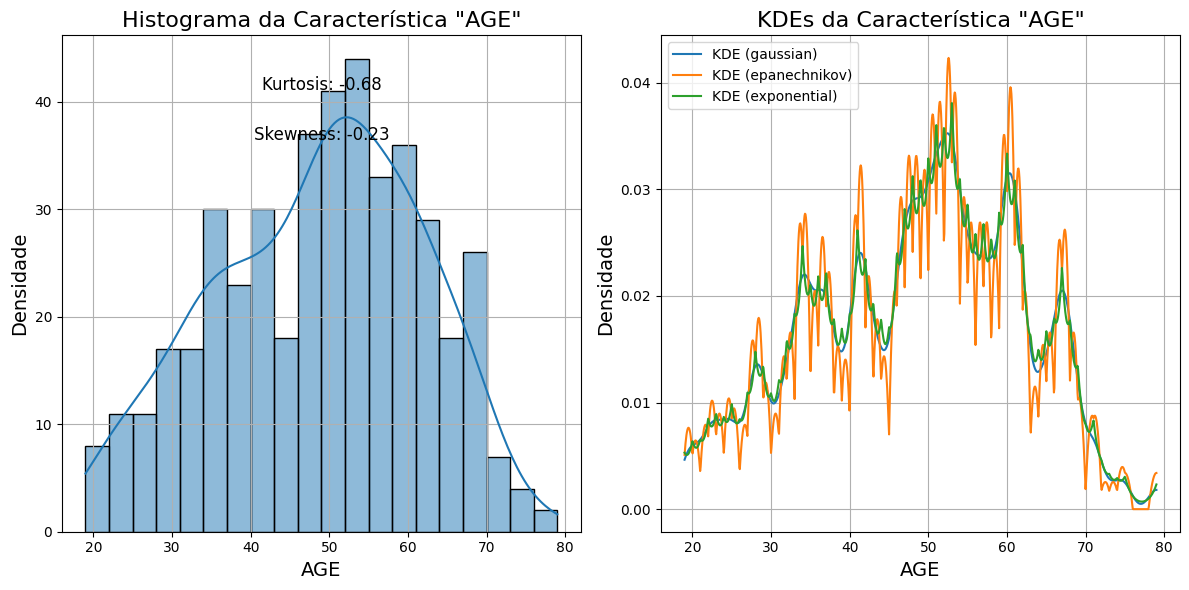

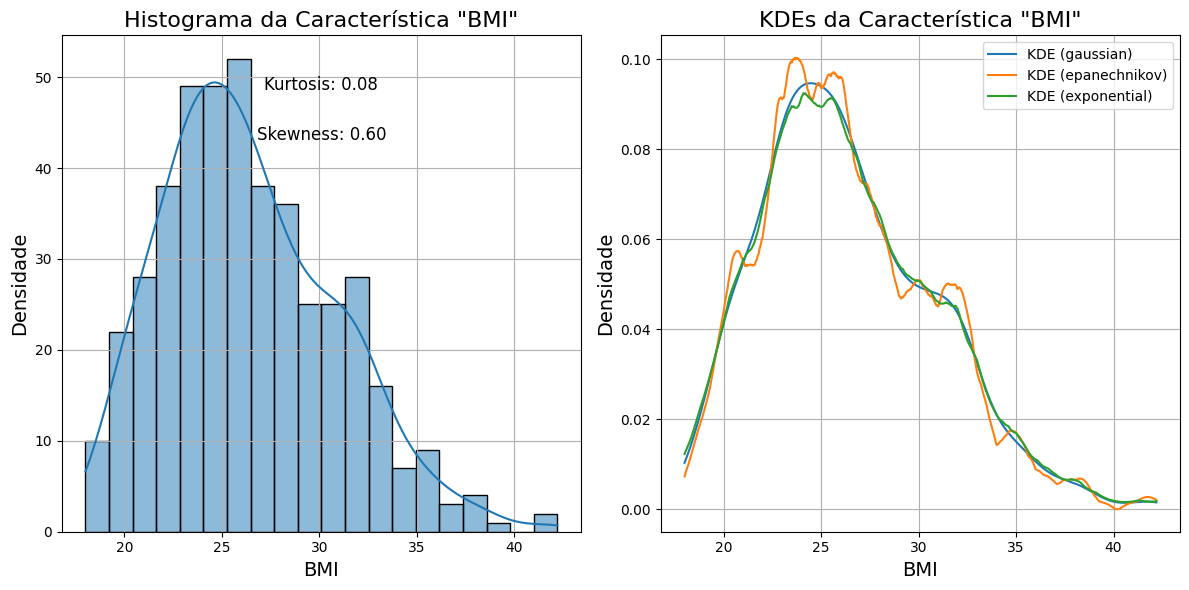

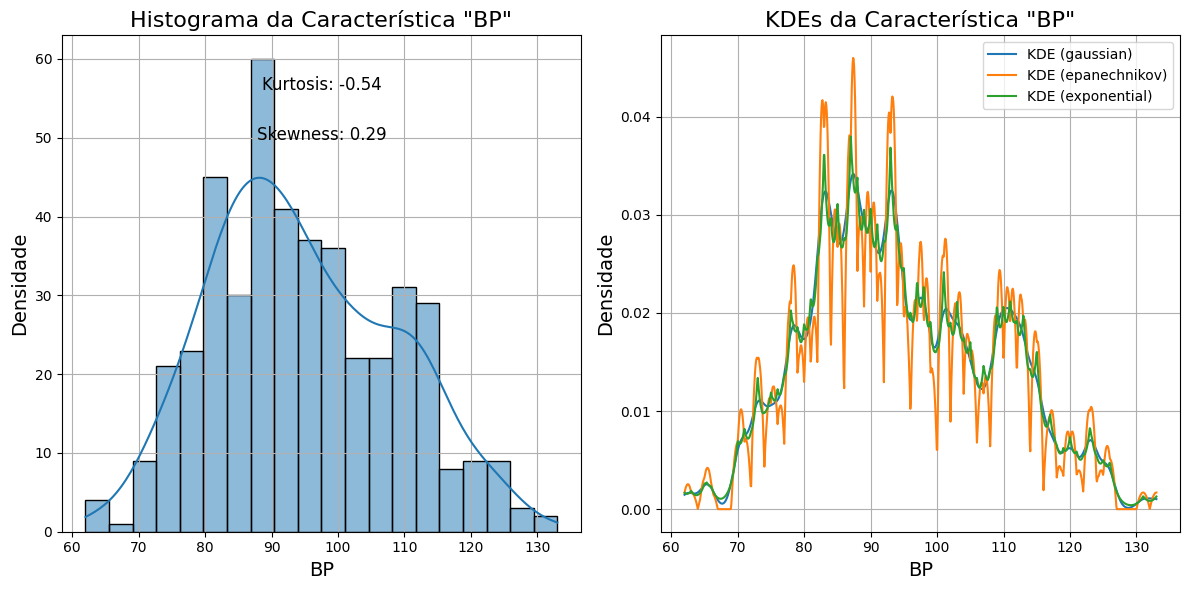

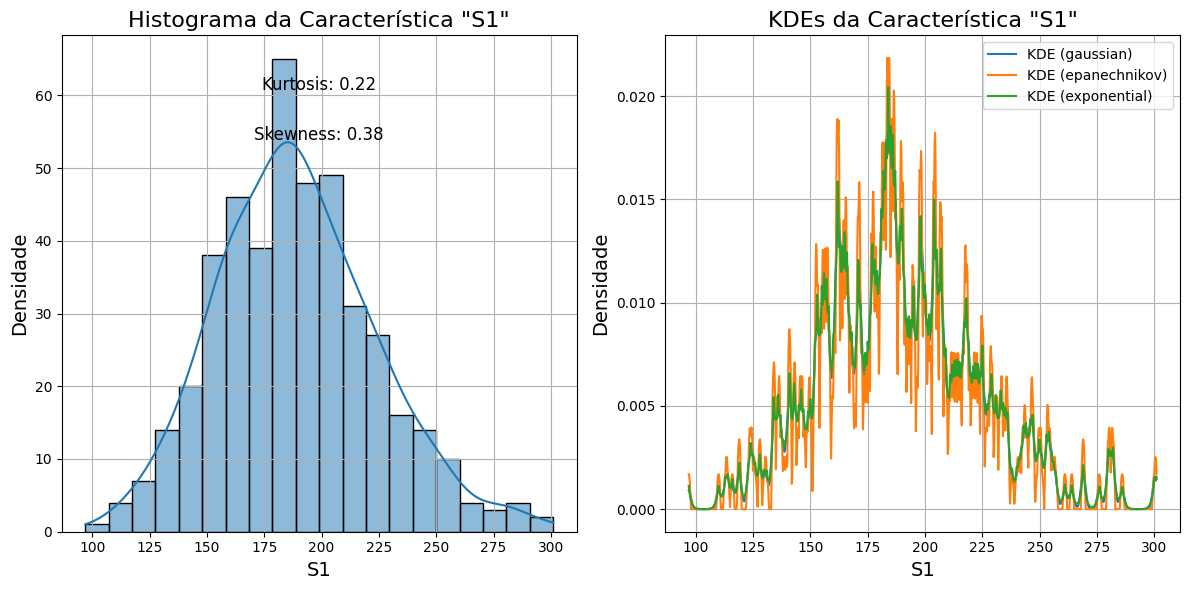

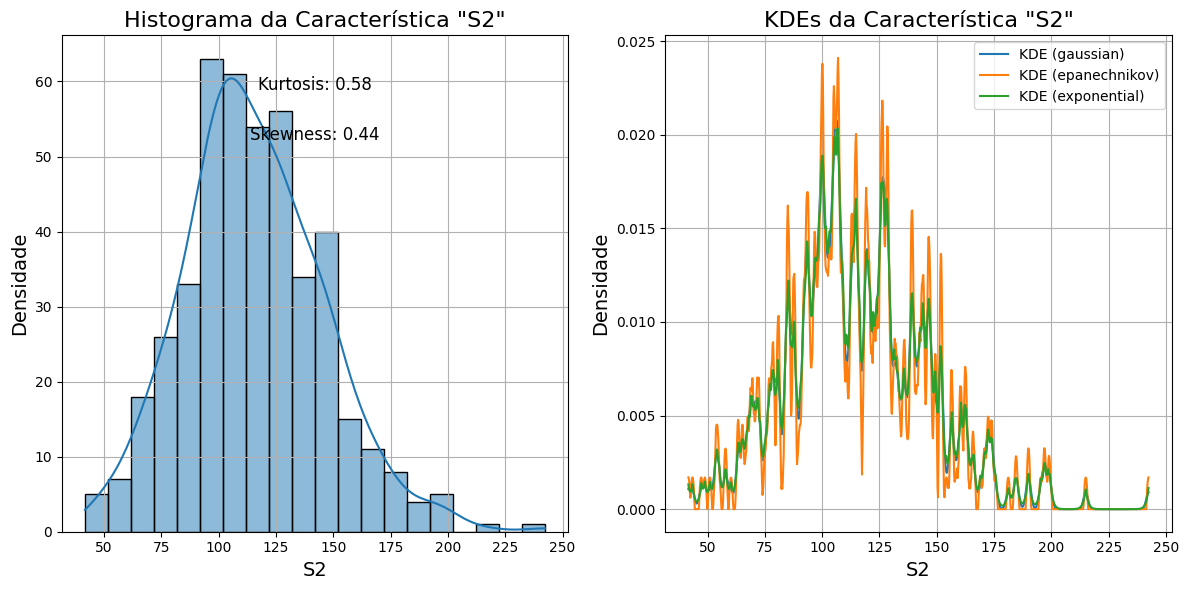

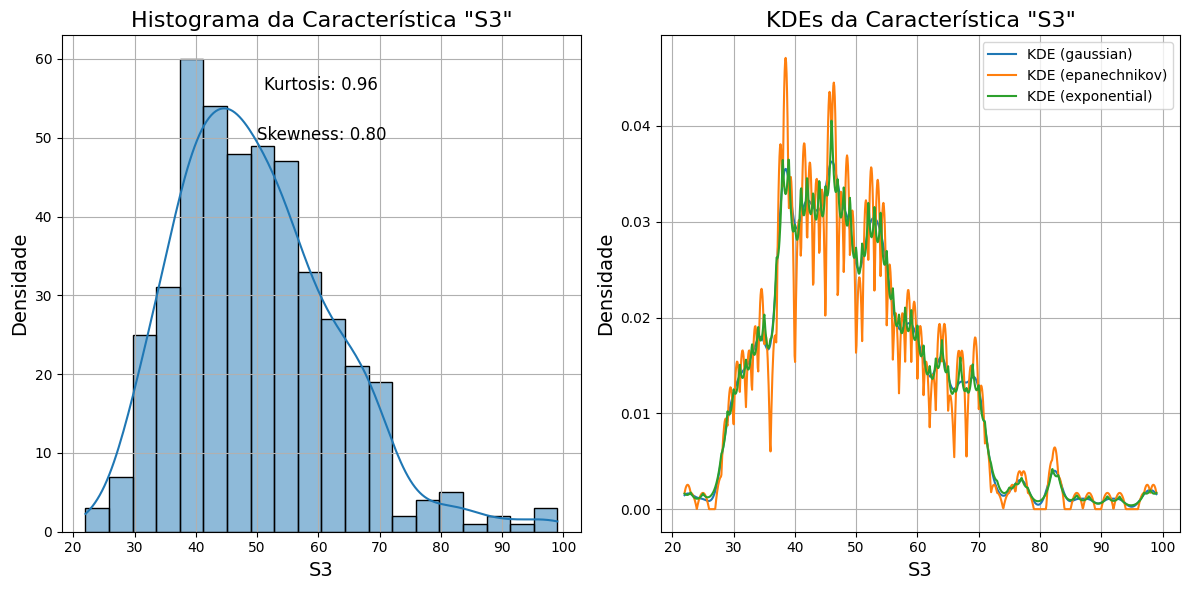

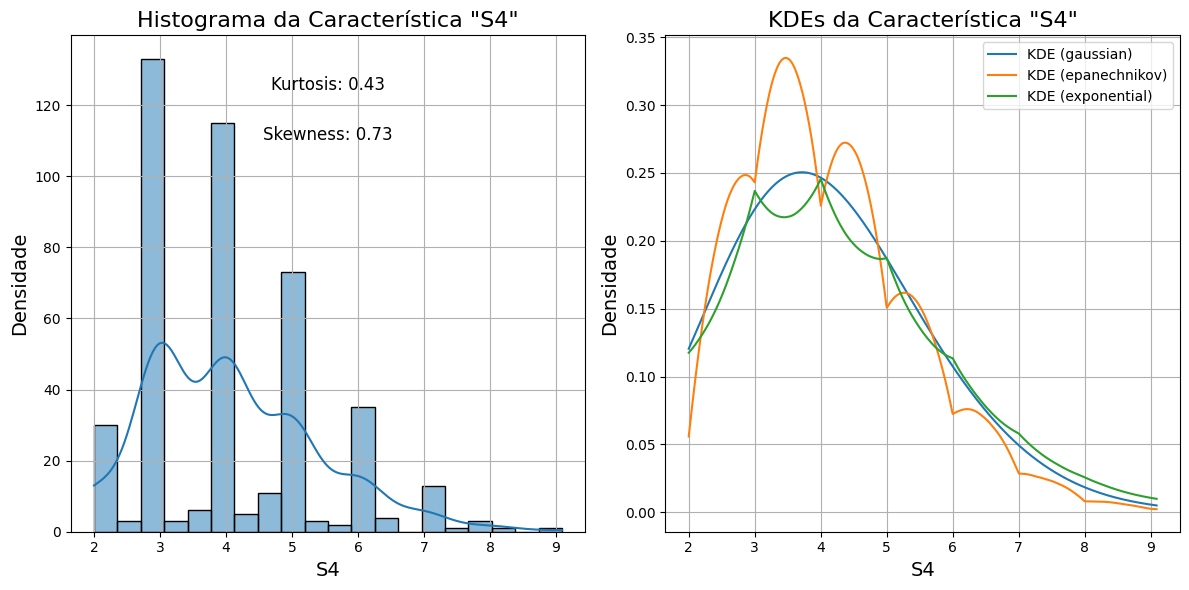

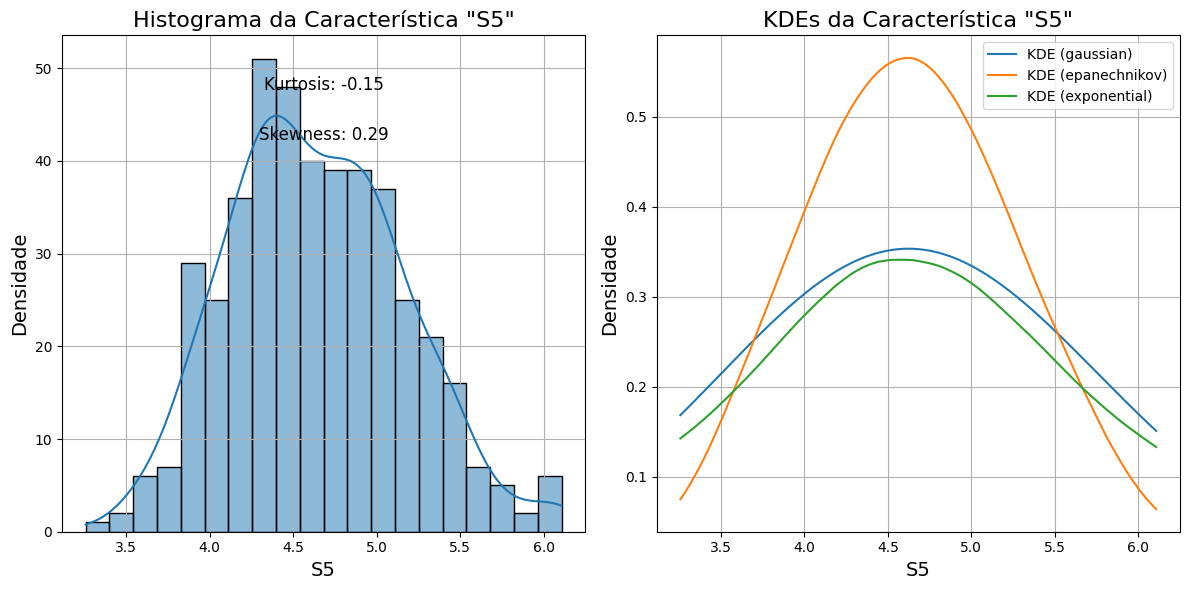

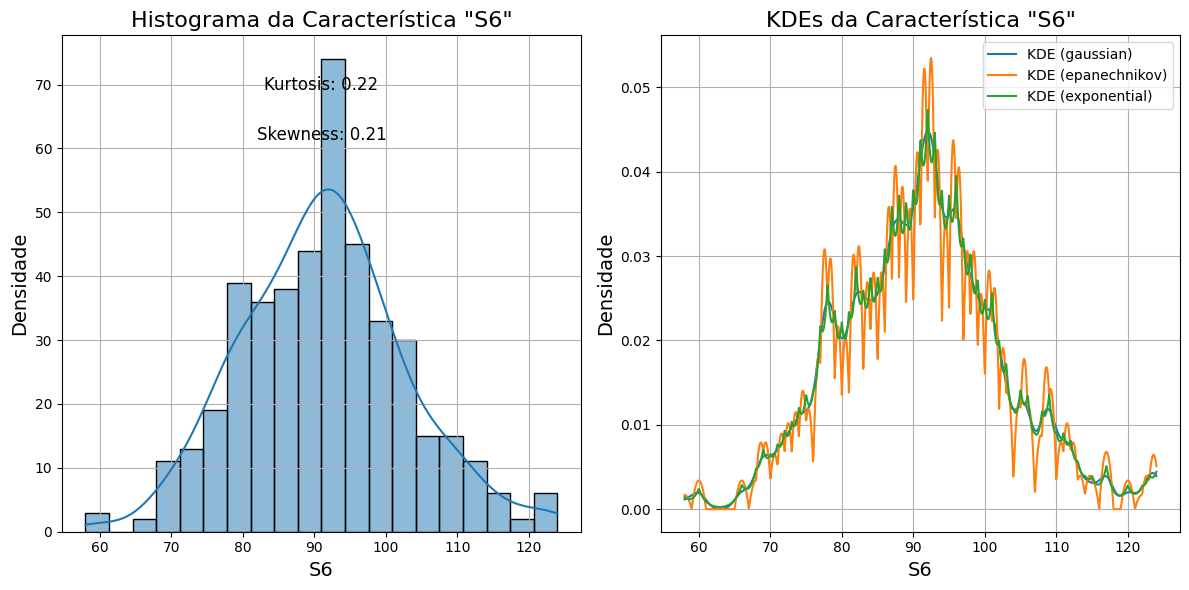

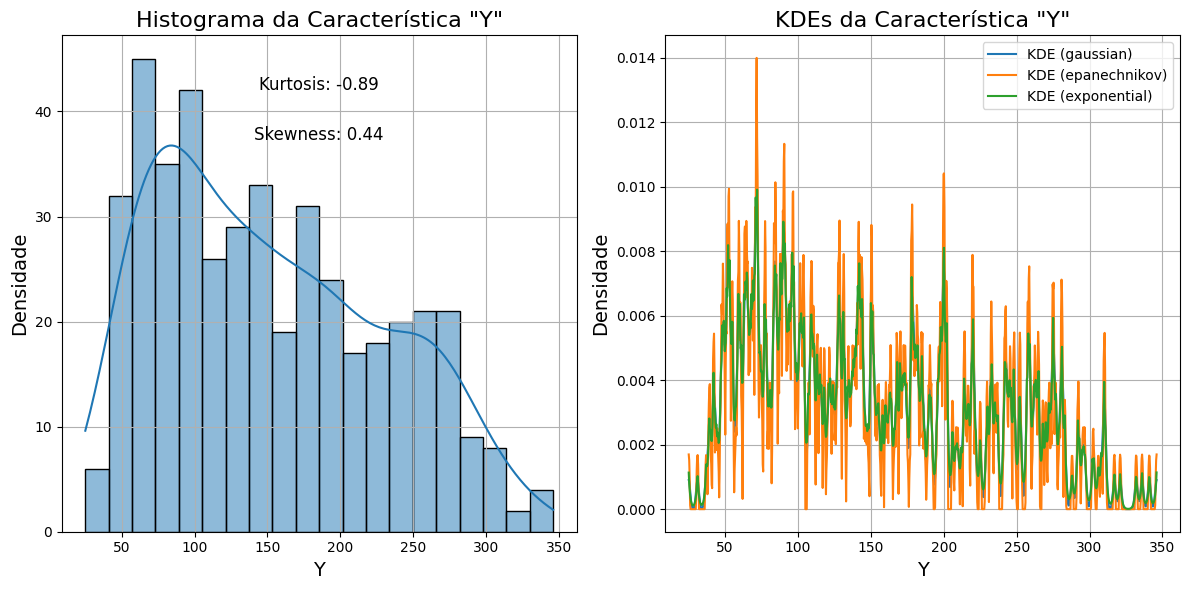

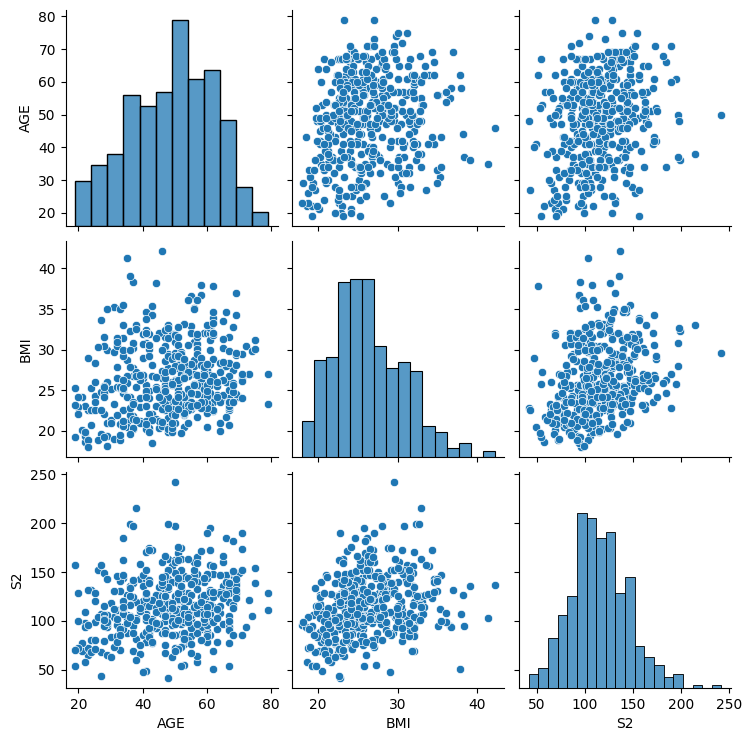

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import kurtosis, skew

#Ten baseline variables, age, sex, body mass index, average blood pressure,
#and six blood serum measurements were obtained for each of n = 442 diabetes
#patients, as well as the response of interest, a quantitative measure of
#disease progression one year after baseline.

# Carregar o conjunto de dados de diabetes
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
diabetes = pd.read_csv(url, sep='\t')

# Avaliar tipos de dados de cada característica
print(diabetes.info())

# Calcular estatísticas descritivas para cada característica
stats = diabetes.describe()

# Imprimir as estatísticas descritivas
print("\nEstatísticas Descritivas:")
print(stats)

# Definir os kernels a serem usados
kernels = ['gaussian', 'epanechnikov', 'exponential']

# Definir larguras de banda para cada kernel
bandwidths = {'gaussian': 1.0, 'epanechnikov': 1.0, 'exponential': 1.0}

# Iterar sobre cada característica, exceto a primeira (índice 0)
for col in diabetes.columns:
    if col != 'SEX':  # Excluir a coluna "SEX"
        # Configurar a figura para o histograma e KDE
        plt.figure(figsize=(12, 6))

        # Plotar o histograma para a característica atual
        plt.subplot(1, 2, 1)
        sns.histplot(diabetes[col], bins=20, kde=True)
        plt.title(f'Histograma da Característica "{col}"', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Densidade', fontsize=14)
        plt.grid(True)

        # Calcular kurtosis e skewness do histograma original
        kurt = kurtosis(diabetes[col])
        skewness = skew(diabetes[col])
        plt.text(0.5, 0.9, f'Kurtosis: {kurt:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
        plt.text(0.5, 0.8, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

        # Adicionar KDEs utilizando diferentes kernels e larguras de banda
        if col != 'SEX':
            plt.subplot(1, 2, 2)
            data = diabetes[col].values.reshape(-1, 1)
            for kernel in kernels:
                kde = KernelDensity(bandwidth=bandwidths[kernel], kernel=kernel)
                kde.fit(data)
                x_vals = np.linspace(data.min(), data.max(), 1000)
                log_dens = kde.score_samples(x_vals.reshape(-1, 1))
                plt.plot(x_vals, np.exp(log_dens), label=f'KDE ({kernel})')
            plt.title(f'KDEs da Característica "{col}"', fontsize=16)
            plt.xlabel(col, fontsize=14)
            plt.ylabel('Densidade', fontsize=14)
            plt.legend()
            plt.grid(True)

        # Ajustar o layout da figura
        plt.tight_layout()

        # Exibir o histograma e os KDEs
        plt.show()

# Pairplot de 'AGE' com 'BMI' e 'S2'
sns.pairplot(diabetes[['AGE', 'BMI', 'S2']])
plt.show()
